In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Food-Truck-LineReg.csv')

In [4]:
df.columns=['X','Y']

In [5]:
df.head()

,X,Y
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [6]:
x_mean=df['X'].mean()
y_mean=df['Y'].mean()

In [7]:
df['x']=df['X']-x_mean
df['y']=df['Y']-y_mean
df['xy']=df['x']*df['y']
df['x2']=df['x']**2
df['y2']=df['y']**2

In [9]:
df.head()

,X,Y,x,y,xy,x2,y2
0,5.5277,9.1302,-2.653451,3.413491,-9.057530,7.040802,11.651918
1,8.5186,13.6620,0.337449,7.945291,2.681130,0.113872,63.127643
2,7.0032,11.8540,-1.177951,6.137291,-7.229428,1.387569,37.666336
3,5.8598,6.8233,-2.321351,1.106591,-2.568785,5.388671,1.224543
4,8.3829,11.8860,0.201749,6.169291,1.244648,0.040703,38.060147


In [10]:
sum_xy=df['xy'].sum()
sum_x2=df['x2'].sum()
sum_y2=df['y2'].sum()

In [11]:
corr=sum_xy/(sum_x2*sum_y2)**0.5

In [25]:
def mean(num):
    sum=0
    for i in range(len(num)):
        sum+=i
    return sum/len(num)

def std(num):
    n=len(num)
    sum=0
    for i in range(len(num)):
        sum+=(num[i]-mean(num))**2
    return ((sum/n)**0.5)

In [27]:
m=(corr*std(df['x'].tolist()))/std(df['y'].tolist())

In [28]:
c=y_mean-(m*x_mean)

In [29]:
df['y_pred']=m*df['X']+c

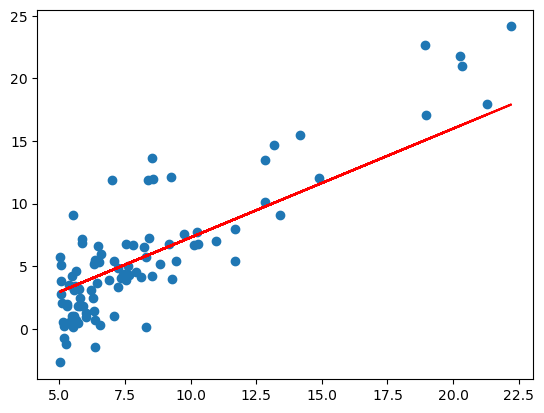

In [31]:
plt.scatter(df['X'],df['Y'])
plt.plot(df['X'],df['y_pred'],color='r')
plt.show()

In [32]:
SSE=sum((df['Y']-df['y_pred'])**2)

In [33]:
SSR=sum((df['y_pred']-mean(df['Y']))**2)

In [34]:
SST=sum((df['Y']-mean(df['Y']))**2)

In [35]:
R2=SSR/SST
cost=SSE/len(df)

In [36]:
print (m,c,SSE,SSR,SST,R2,cost)

0.8694858886253549 -1.3966860084417956 833.9290868885098 -4011.1959000000006 170376.2424082264 -0.023543164488796856 8.686761321755311
